In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
df = pd.read_csv("../Datasets/DATA_3.01_CREDIT.csv")
df.head(2)

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.89,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.03,483,3,82,15,Female,Yes,Yes,Asian,903


# Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     300 non-null    float64
 1   Rating     300 non-null    int64  
 2   Cards      300 non-null    int64  
 3   Age        300 non-null    int64  
 4   Education  300 non-null    int64  
 5   Gender     300 non-null    object 
 6   Student    300 non-null    object 
 7   Married    300 non-null    object 
 8   Ethnicity  300 non-null    object 
 9   Balance    300 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 23.6+ KB


In [5]:
df.describe()

,Income,Rating,Cards,Age,Education,Balance
count,300.00,300.00,300.00,300.00,300.00,300.00
mean,44.05,348.12,3.03,54.98,13.39,502.69
std,33.86,150.87,1.35,17.22,3.08,466.99
min,10.35,93.00,1.00,24.00,5.00,0.00
25%,21.03,235.00,2.00,41.00,11.00,15.75
50%,33.12,339.00,3.00,55.00,14.00,433.50
75%,55.98,433.00,4.00,69.00,16.00,857.75
max,186.63,949.00,8.00,91.00,20.00,"1,809.00"


In [6]:
# Summary statistics for object dtypes:
df.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,300,300,300,300
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,168,268,183,141


In [7]:
# As we can see from above our object variables are actually categorical
# So let's convert them to the right type
cols = ['Gender', 'Student', 'Married', 'Ethnicity']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Income     300 non-null    float64 
 1   Rating     300 non-null    int64   
 2   Cards      300 non-null    int64   
 3   Age        300 non-null    int64   
 4   Education  300 non-null    int64   
 5   Gender     300 non-null    category
 6   Student    300 non-null    category
 7   Married    300 non-null    category
 8   Ethnicity  300 non-null    category
 9   Balance    300 non-null    int64   
dtypes: category(4), float64(1), int64(5)
memory usage: 15.9 KB


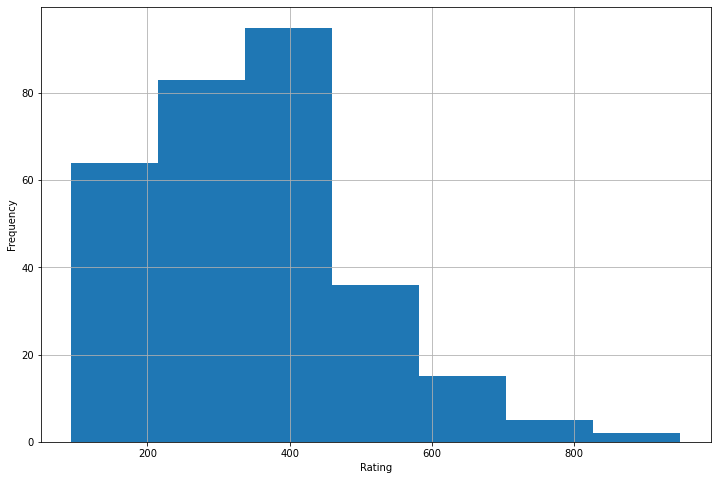

In [8]:
df['Rating'].hist(bins=7)
plt.ylabel('Frequency')
plt.xlabel('Rating');

In [9]:
# Compute the correlation between all the numerical variables of the sample
# without considering object data
df.select_dtypes(exclude='category').corr()

,Income,Rating,Cards,Age,Education,Balance
Income,1.00,0.77,0.03,0.12,-0.07,0.43
Rating,0.77,1.00,0.10,0.04,-0.10,0.86
Cards,0.03,0.10,1.00,0.05,0.02,0.12
Age,0.12,0.04,0.05,1.00,-0.05,-0.05
Education,-0.07,-0.10,0.02,-0.05,1.00,-0.07
Balance,0.43,0.86,0.12,-0.05,-0.07,1.00


The output of the correlation function provides us with numbers that do not really tell us which variables are most important, or significant in predicting the credit score. We do not know either how they
contribute to that score

--> Use correlation for a quick and simple summary of the direction and strength of the relationship between two or more numeric variables.

--> Use regression when you’re looking to predict, optimize, or explain a number response between the variables (how x influences y)

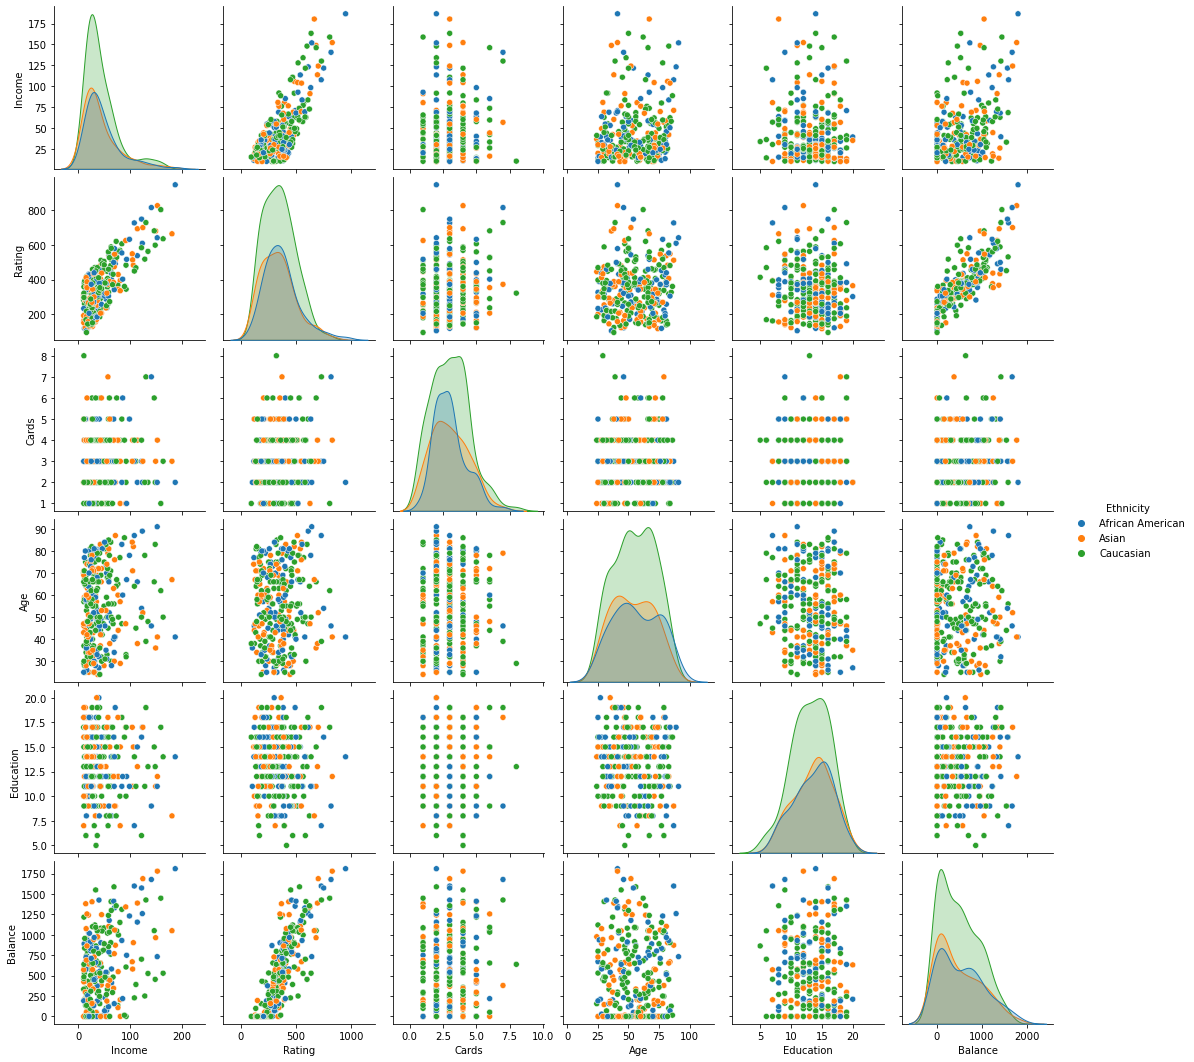

In [10]:
sns.pairplot(df, hue='Ethnicity');

# Linear Regression Models

## Simple Linear Regression With statsmodel

In [11]:
# Estimate a linear regression model of Rating 
# as a function of everything else
all_columns = "+".join(df.columns).replace('Rating+', '')
my_formula = 'Rating~' + all_columns
linreg = smf.ols(my_formula, data=df).fit()

In [12]:
# Compute the correlation between the fitted values and the actual ones
np.corrcoef(df['Rating'], linreg.fittedvalues)[1,0]

0.9867324157146664

As we can see, we obtain almost 0.99 as correlation coefficient. 
Now let's visualize the result by plugging the fitted values as a function of the actual values.

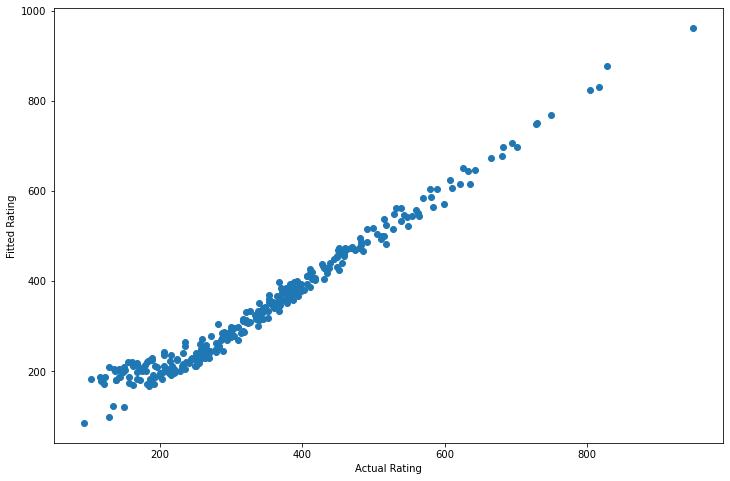

In [13]:
# plot the fitted values vs the actual values:
plt.scatter(df['Rating'], linreg.fittedvalues)
plt.xlabel('Actual Rating')
plt.ylabel('Fitted Rating');

We can clearly see that the model does pretty well on higher values but not so well on lower values

In [14]:
# Print the results of the regression
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1067.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):          1.17e-221
Time:                        17:17:53   Log-Likelihood:                -1384.7
No. Observations:                 300   AIC:                             2791.
Df Residuals:                     289   BIC:                             2832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                140.8814      9.666     14.575      0.000     121.856     159.906
Gender[T.Female]           1.7704      2.918      0.607      0.544      -3.973       7.513
Student[T.Yes]           -98.8048      4.960    -19.921      0.000    -108.567     -89.043
Married[T.Yes]             3.1769      3.006      1.057      0.291      -2.739       9.092
Ethnicity[T.Asian]        -4.4283      4.007     -1.105      0.270     -12.315       3.458
Ethnicity[T.Caucasian]    -1.2506      3.534     -0.354      0.724      -8.206       5.705
Income                     2.0947      0.048     43.533      0.000       2.000       2.189
Cards                     -0.7629      1.080     -0.706      0.480      -2.888       1.363
Age                        0.1446      0.086      1.684      0.093      -0.024       0.314
Education                  0.1794      0.474      0.379      0.705      -0.753       1.112
Balance                    0.2314      0.004     63.189      0.000       0.224       0.239
==============================================================================
Omnibus:                       42.495   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.375
Skew:                          -0.987   Prob(JB):                     5.73e-13
Kurtosis:                       3.784   Cond. No.                     4.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the **P>|t|** column in the second table we can see that the statistically significane values are: Student, Income and Balance, since they are almost 0.

We can also see from the **coef** column in the same table that the fact of being student has a strong negative impact on the rating score. So let's plot that

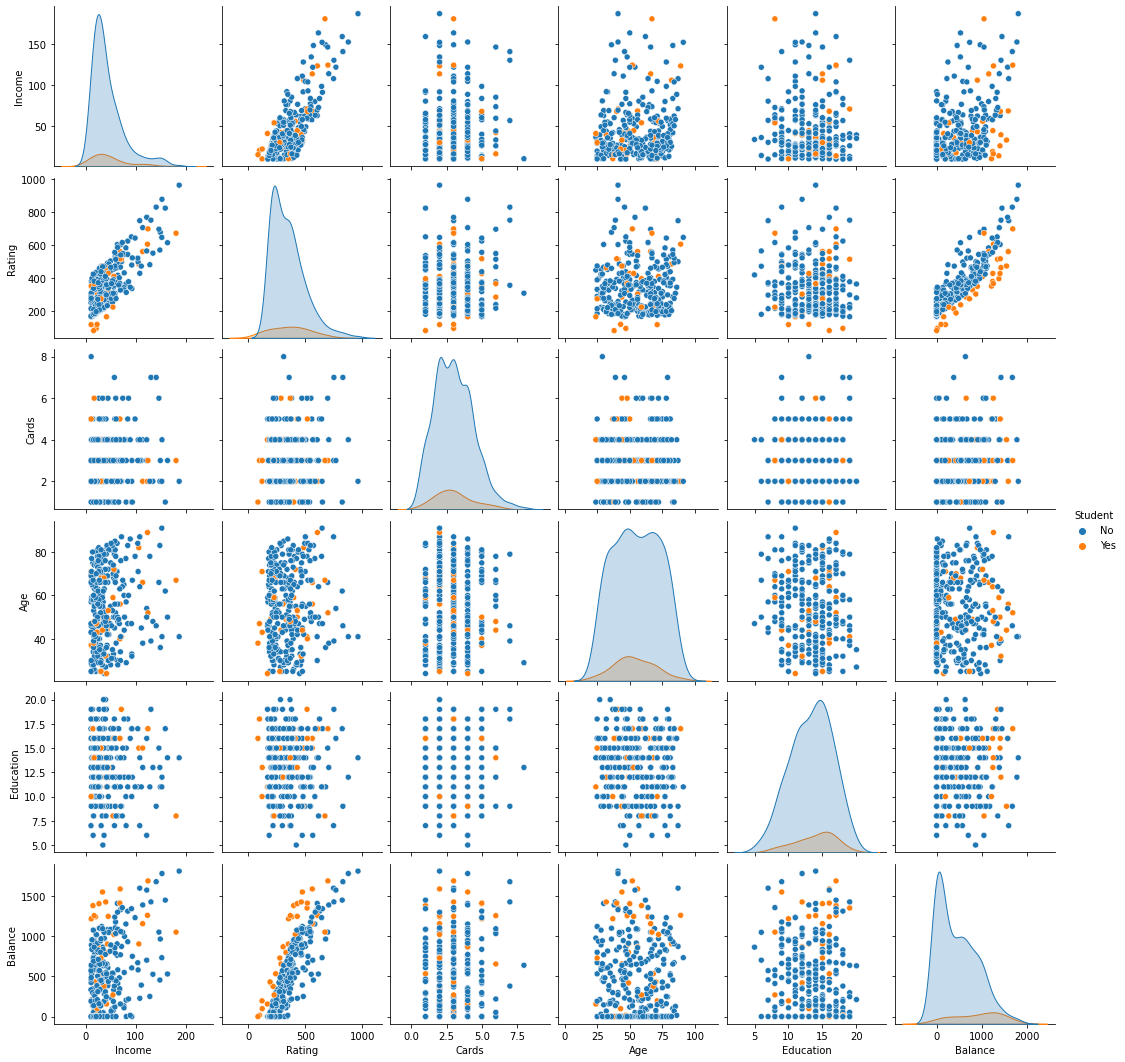

In [15]:
cdf = df.copy()
cdf['Rating'] = linreg.fittedvalues
sns.pairplot(cdf, hue='Student');